## ECE6960 Homework2 Yufeng Yang

### Package Preparation
Import numpy for matrix computing.
Import matplotlib for plotting

In [70]:
import numpy as np
from matplotlib import pyplot as plt

### Data Generation
Specify m and n, sigma(variance for noise) for the data.

In [71]:
# Specify m, n
m = 500
n = 50
# Specify the mean and variance of noise \delta, which follows normal distribution.
mu = 0
# This can be changed.
sigma = 0.8
np.random.seed(1234)

In [72]:
# define a function to generate experimental data.
# Input args: m,n are matrix shape; mu and sigma are for noise data.
def data_generator(m,n,mu, sigma):
    # A is a matrix with size R^{m*n}
    
    A = np.empty([m,n])
    # ground truth 
    z = 10*np.random.rand(n,1)
    # create noise vector with the length equals to m
    for i in range(m):
        for j in range(n):
            A[i,j] = np.random.normal(mu, 1)
        norm_A_i = np.linalg.norm(A[i,:],2)
        # scale each row of A such that the norm of each row is equal to 1.
        A[i,:] = A[i,:]/norm_A_i
    delta = np.random.normal(mu, sigma, size=(m,1))
    return A, z, delta
    

In [73]:
A, z, delta = data_generator(m,n,mu,sigma)
# generate observations
b = np.matmul(A,z)+delta
# check about A,z,b's shape
print(A.shape)
print(z.shape)
print(delta.shape)
print(b.shape)
print(np.linalg.norm(A[1,:],2))

(500, 50)
(50, 1)
(500, 1)
(500, 1)
1.0


In [74]:
#print(A)
#print("---***---")
#print(z)
#print("---***---")
#print(delta)

In [75]:
# define a function compute least square loss function value.
def least_square(A,x,b):
    residual = np.matmul(A,x)-b
    loss = 0.5*np.linalg.norm(residual,2)**2
    return loss

In [76]:
# define a function compute gradient
def least_square_grad(A,x,b):
    residual = np.matmul(A,x)-b
    # gradient is A^T(Ax-b)
    grad = np.matmul(np.transpose(A),residual)
    return grad

In [77]:
# generate initial guess
x0 = z+5*np.random.normal(1,1,size = (z.shape[0],z.shape[1]))

In [78]:
print(x0)
print(z)

[[-1.83199015]
 [12.31107652]
 [ 9.38727108]
 [14.80615973]
 [15.73165837]
 [ 5.7759575 ]
 [-2.12012345]
 [16.60972677]
 [19.2831095 ]
 [17.68120053]
 [ 1.69597812]
 [ 8.35374792]
 [ 8.30220288]
 [19.42893025]
 [ 8.47250201]
 [17.88888907]
 [ 3.40437308]
 [ 3.85503629]
 [17.79712773]
 [14.90010191]
 [14.46398133]
 [15.71520615]
 [11.98141918]
 [16.57216393]
 [21.50076316]
 [10.4507935 ]
 [13.94751482]
 [ 8.16827851]
 [ 2.29515193]
 [ 9.26120032]
 [ 5.08596502]
 [ 8.05424058]
 [13.38487195]
 [ 9.17213981]
 [19.9165741 ]
 [13.3769188 ]
 [13.00540409]
 [ 7.64899932]
 [12.69516724]
 [17.20771868]
 [-0.71844652]
 [-0.86499653]
 [ 9.23951829]
 [ 2.24459299]
 [16.95257829]
 [ 6.92885652]
 [-0.77029597]
 [12.2173633 ]
 [ 4.24657174]
 [14.26345398]]
[[1.9151945 ]
 [6.22108771]
 [4.37727739]
 [7.85358584]
 [7.79975808]
 [2.72592605]
 [2.76464255]
 [8.01872178]
 [9.58139354]
 [8.75932635]
 [3.5781727 ]
 [5.00995126]
 [6.83462935]
 [7.12702027]
 [3.70250755]
 [5.61196186]
 [5.03083165]
 [0.1376845

In [79]:
# specify learning rate
lr = 0.1

In [80]:
print(least_square(A,x0,b))
print(least_square_grad(A,x0,b).shape)

12068.560241773142
(50, 1)


In [81]:
# define a stopping creteria
stop_criteria = 1e-8
norm_grad = np.linalg.norm(least_square_grad(A,x0,b),2)
err_ratio = np.linalg.norm(x0-z,2)/np.linalg.norm(z,2)
obj_val = np.empty(0)
estimation_err = np.empty(0)
#loss=east_square(A,x0,b)
#raining_loss = np.append(training_loss, loss)
loop = 0
#print(obj_val)
#print(estimation_err)
while norm_grad > stop_criteria:
    
    grad = least_square_grad(A,x0,b)
    # gradient update
    x0 = x0 - lr*grad
    norm_grad = np.linalg.norm(grad,2)
    loss_val = least_square(A,x0,b)
    # record training loss and estimation error.
    #print(obj_val)
    obj_val = np.append(obj_val, loss_val)
    
    err_ratio = np.linalg.norm(x0-z,2)/np.linalg.norm(z,2)
    estimation_err = np.append(estimation_err, err_ratio)
    

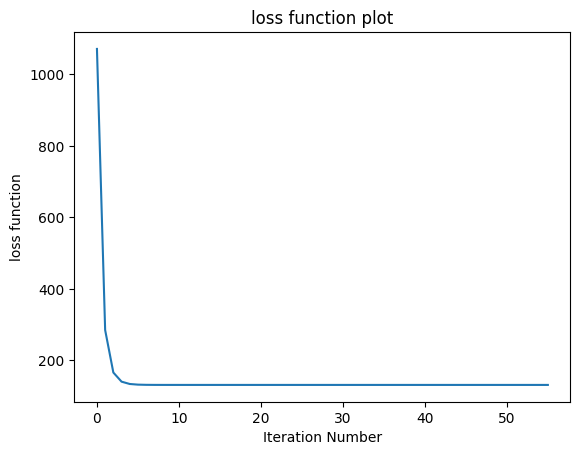

In [82]:
# make a plot.
plt.plot(obj_val)
plt.xlabel('Iteration Number')
plt.ylabel('loss function')
plt.title('loss function plot')
plt.savefig("Visualization of loss function", dpi = 150)

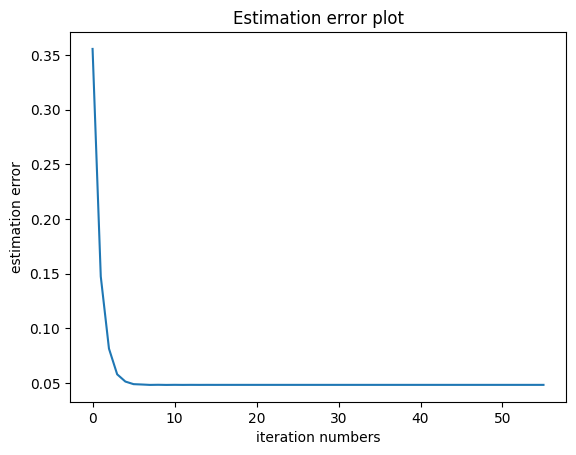

In [83]:
# make a plot
plt.plot(estimation_err)
plt.xlabel('iteration numbers')
plt.ylabel('estimation error')
plt.title('Estimation error plot')
plt.savefig('Visualization of estimation error', dpi = 150)

In [84]:
print(estimation_err)

[0.35560305 0.14735522 0.08134191 0.05784741 0.05121708 0.04884181
 0.04852684 0.04815635 0.04826833 0.04813881 0.0482223  0.04816008
 0.04820469 0.04817373 0.04819594 0.04818076 0.04819151 0.04818419
 0.04818932 0.04818583 0.04818825 0.0481866  0.04818774 0.04818697
 0.0481875  0.04818714 0.04818738 0.04818722 0.04818733 0.04818725
 0.04818731 0.04818727 0.04818729 0.04818728 0.04818729 0.04818728
 0.04818729 0.04818728 0.04818729 0.04818728 0.04818728 0.04818728
 0.04818728 0.04818728 0.04818728 0.04818728 0.04818728 0.04818728
 0.04818728 0.04818728 0.04818728 0.04818728 0.04818728 0.04818728
 0.04818728 0.04818728]
